In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('threads.csv')

print(df.head())

        source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   
2  Google Play  For a brand new app, it's very well optimized....       3   
3  Google Play  Great app with a lot of potential! However, th...       3   
4  Google Play  The app is good, but it needs a lot of functio...       3   

           review_date  
0  2023-07-08 14:18:24  
1  2023-07-19 20:52:48  
2  2023-07-06 23:03:11  
3  2023-07-10 00:53:25  
4  2023-07-06 16:57:43  


In [3]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Check for any missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB
None
             rating
count  32910.000000
mean       3.398481
std        1.751480
min        1.000000
25%        1.000000
50%        4.000000
75%        5.000000
max        5.000000
source                0
review_description    0
rating                0
review_date           0
dtype: int64


In [4]:
# Convert the 'review_date' column to datetime format
df['review_date'] = pd.to_datetime(df['review_date'])

# Remove unnecessary columns if needed
# For example, if 'source' is not relevant for sentiment analysis
# df = df.drop(columns=['source'])

# Check the changes
print(df.head())


        source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   
2  Google Play  For a brand new app, it's very well optimized....       3   
3  Google Play  Great app with a lot of potential! However, th...       3   
4  Google Play  The app is good, but it needs a lot of functio...       3   

          review_date  
0 2023-07-08 14:18:24  
1 2023-07-19 20:52:48  
2 2023-07-06 23:03:11  
3 2023-07-10 00:53:25  
4 2023-07-06 16:57:43  


In [5]:
from textblob import TextBlob

# Define a function for sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

# Apply sentiment analysis to the 'review_description' column
df['sentiment'] = df['review_description'].apply(analyze_sentiment)

# Display the updated DataFrame with sentiment scores
print(df[['review_description', 'sentiment']])


                                      review_description  sentiment
0      Meh. Not the greatest experience on a Chromebo...   0.092187
1      Pretty good for a first launch!! Its easy to u...   0.282205
2      For a brand new app, it's very well optimized....   0.153438
3      Great app with a lot of potential! However, th...   0.128571
4      The app is good, but it needs a lot of functio...   0.313333
...                                                  ...        ...
32905  This killed my dog. Mark zuckerburg strangled ...  -0.200000
32906              Add Search and hashtag like Twitter !   0.000000
32907                                        bad twister  -0.700000
32908                       Yet another trash from Meta.   0.000000
32909  Nothing special this app is just a copy of twi...   0.357143

[32910 rows x 2 columns]


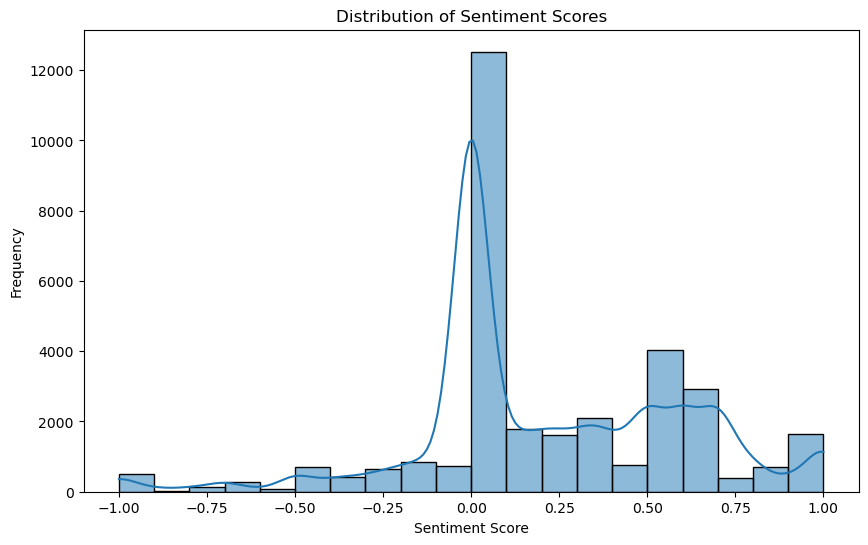

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

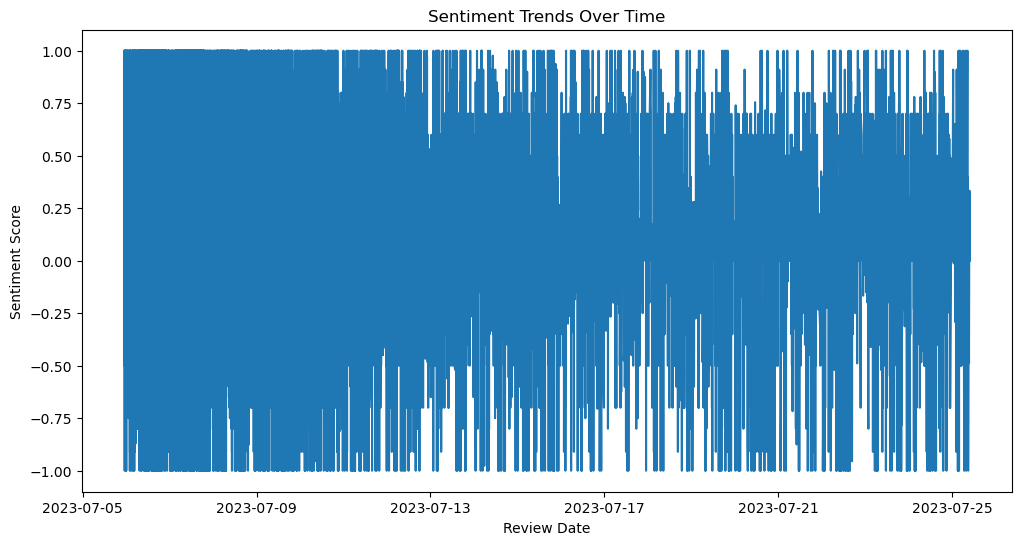

In [7]:
# Visualize sentiment trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='review_date', y='sentiment', data=df)
plt.title('Sentiment Trends Over Time')
plt.xlabel('Review Date')
plt.ylabel('Sentiment Score')
plt.show()

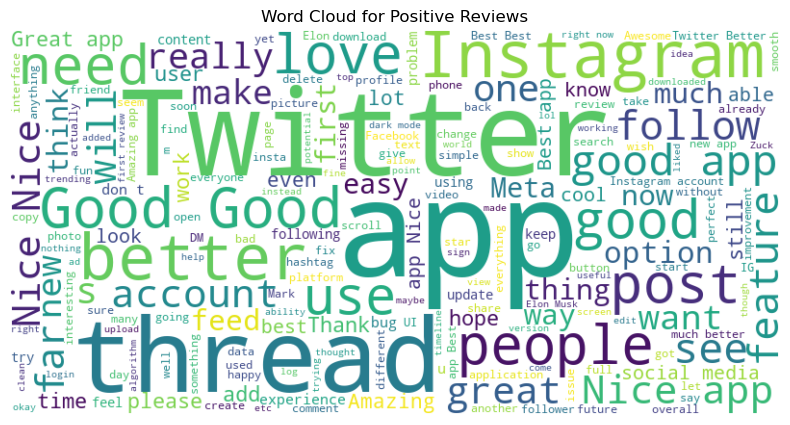

In [8]:
from wordcloud import WordCloud

# Generate a Word Cloud for positive reviews
positive_reviews = df[df['sentiment'] > 0]['review_description'].str.cat(sep=' ')
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Display the Word Cloud for positive reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

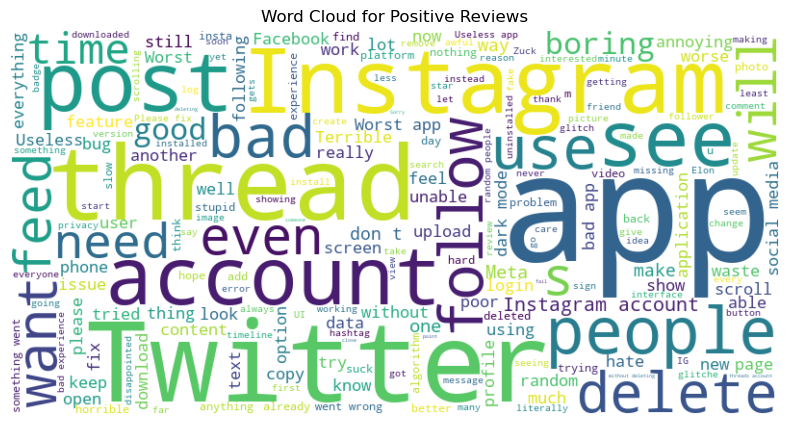

In [9]:
from wordcloud import WordCloud

# Generate a Word Cloud for positive reviews
positive_reviews = df[df['sentiment'] < 0]['review_description'].str.cat(sep=' ')
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Display the Word Cloud for positive reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.85, max_features=1000, stop_words='english')
text_vectorized = vectorizer.fit_transform(df['review_description'])

# Apply LDA for topic modeling
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topic_matrix = lda_model.fit_transform(text_vectorized)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"\nTopic #{topic_idx + 1}:", [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])


Topic #1: ['good', 'app', 'post', 'add', 'like', 'need', 'option', 'thread', 'far', 'threads']

Topic #2: ['twitter', 'better', 'app', 'like', 'love', 'copy', 'threads', 'amazing', 'just', 'elon']

Topic #3: ['app', 'nice', 'best', 'application', 'cool', 'hai', 'super', 'awesome', 'wow', 'excellent']

Topic #4: ['instagram', 'account', 'threads', 'don', 'people', 'app', 'follow', 'just', 'want', 'feed']

Topic #5: ['app', 'great', 'use', 'like', 'time', 'review', 'screen', 'new', 'really', 'phone']


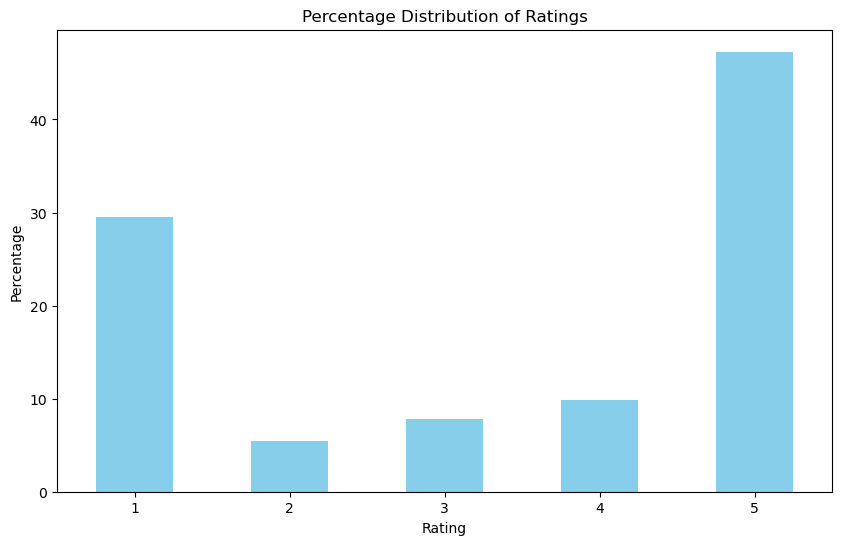

In [11]:
# Calculate the percentage of each rating
rating_percentage = df['rating'].value_counts(normalize=True) * 100

# Plot the percentage bar chart
plt.figure(figsize=(10, 6))
rating_percentage.sort_index().plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()